In [1]:
import sys
print(sys.version)

3.10.18 | packaged by Anaconda, Inc. | (main, Jun  5 2025, 13:08:55) [MSC v.1929 64 bit (AMD64)]


In [2]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

### Load Dataset with Bigger Size

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# ==== 1. Dataset Paths ====
train_dir = r"C:\Users\bishn\Downloads\project\training\train"
test_dir  = r"C:\Users\bishn\Downloads\project\training\test"

# ==== 2. Data Generators ====
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

# ==== 3. Get number of classes ====
num_classes = len(train_generator.class_indices)

# ==== 4. Build Model ====
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # auto from dataset
])

# ==== 5. Compile Model ====
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Found 28710 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


C:\Users\bishn\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,543 (12.61 MB)

 Trainable params: 3,305,543 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

### train the dataset

In [3]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10
)

C:\Users\bishn\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 763s 843ms/step - accuracy: 0.2977 - loss: 1.7399 - val_accuracy: 0.4323 - val_loss: 1.4792
Epoch 2/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 220s 245ms/step - accuracy: 0.4707 - loss: 1.3839 - val_accuracy: 0.4870 - val_loss: 1.3201
Epoch 3/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 219s 244ms/step - accuracy: 0.5630 - loss: 1.1516 - val_accuracy: 0.5184 - val_loss: 1.2727
Epoch 4/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 348s 387ms/step - accuracy: 0.6320 - loss: 0.9937 - val_accuracy: 0.5359 - val_loss: 1.3070
Epoch 5/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 622s 692ms/step - accuracy: 0.7173 - loss: 0.7754 - val_accuracy: 0.5247 - val_loss: 1.3760
Epoch 6/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 288s 320ms/step - accuracy: 0.7984 - loss: 0.5705 - val_accuracy: 0.5176 - val_loss: 1.6581
Epoch 7/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 213s 237ms/step - accuracy: 0.8687 - loss: 0.3848 - val_accuracy: 0.5164 - val_loss: 2.0588
Epoch 8/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 213s 237ms/step - accuracy: 0.9118 -

### Evaluate the Model

In [4]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. Load the saved model
model = load_model(r"C:\Users\bishn\Downloads\project\saved_models\emotion_model.h5")

# 2. Prepare the test dataset
test_dir = r"C:\Users\bishn\Downloads\project\training\test"  # folder containing test images

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),  # same size used for training
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# 3. Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Found 7178 images belonging to 7 classes.


C:\Users\bishn\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


225/225 ━━━━━━━━━━━━━━━━━━━━ 191s 843ms/step - accuracy: 0.4783 - loss: 3.6275
Test Accuracy: 51.38%


### Save the Model

In [5]:
model.save("emotion_model.h5")
print("Model saved as emotion_model.h5")

Model saved as emotion_model.h5


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Your dataset path
DATASET_PATH = r"C:\Users\bishn\Downloads\project\training\train"

# Parameters
IMG_SIZE = (48, 48)  # FER-2013 images are 48x48
BATCH_SIZE = 32

# ImageDataGenerator with train/validation split
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% for validation
)

# Training generator
train_generator = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    color_mode="grayscale",  # FER-2013 is grayscale
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Validation generator
val_generator = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    color_mode="grayscale",
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

print("Class indices:", train_generator.class_indices)


Found 22969 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Class indices: {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6}


In [28]:
model.save(r"C:\Users\bishn\Downloads\project\saved_models\emotion_model.h5")

### Test with New Images

In [6]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the model
model = load_model(r"C:\Users\bishn\Downloads\project\model.h5")

# Create a test data generator (grayscale, 48x48, no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the test dataset
test_generator = test_datagen.flow_from_directory(
    r"C:\Users\bishn\Downloads\project\training\test",       # Folder with class subfolders
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")

C:\Users\bishn\AppData\Roaming\Python\Python310\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Found 7178 images belonging to 7 classes.
225/225 ━━━━━━━━━━━━━━━━━━━━ 26s 105ms/step - accuracy: 0.4685 - loss: 1.3009
Test Accuracy: 56.05%
Test Loss: 1.1374


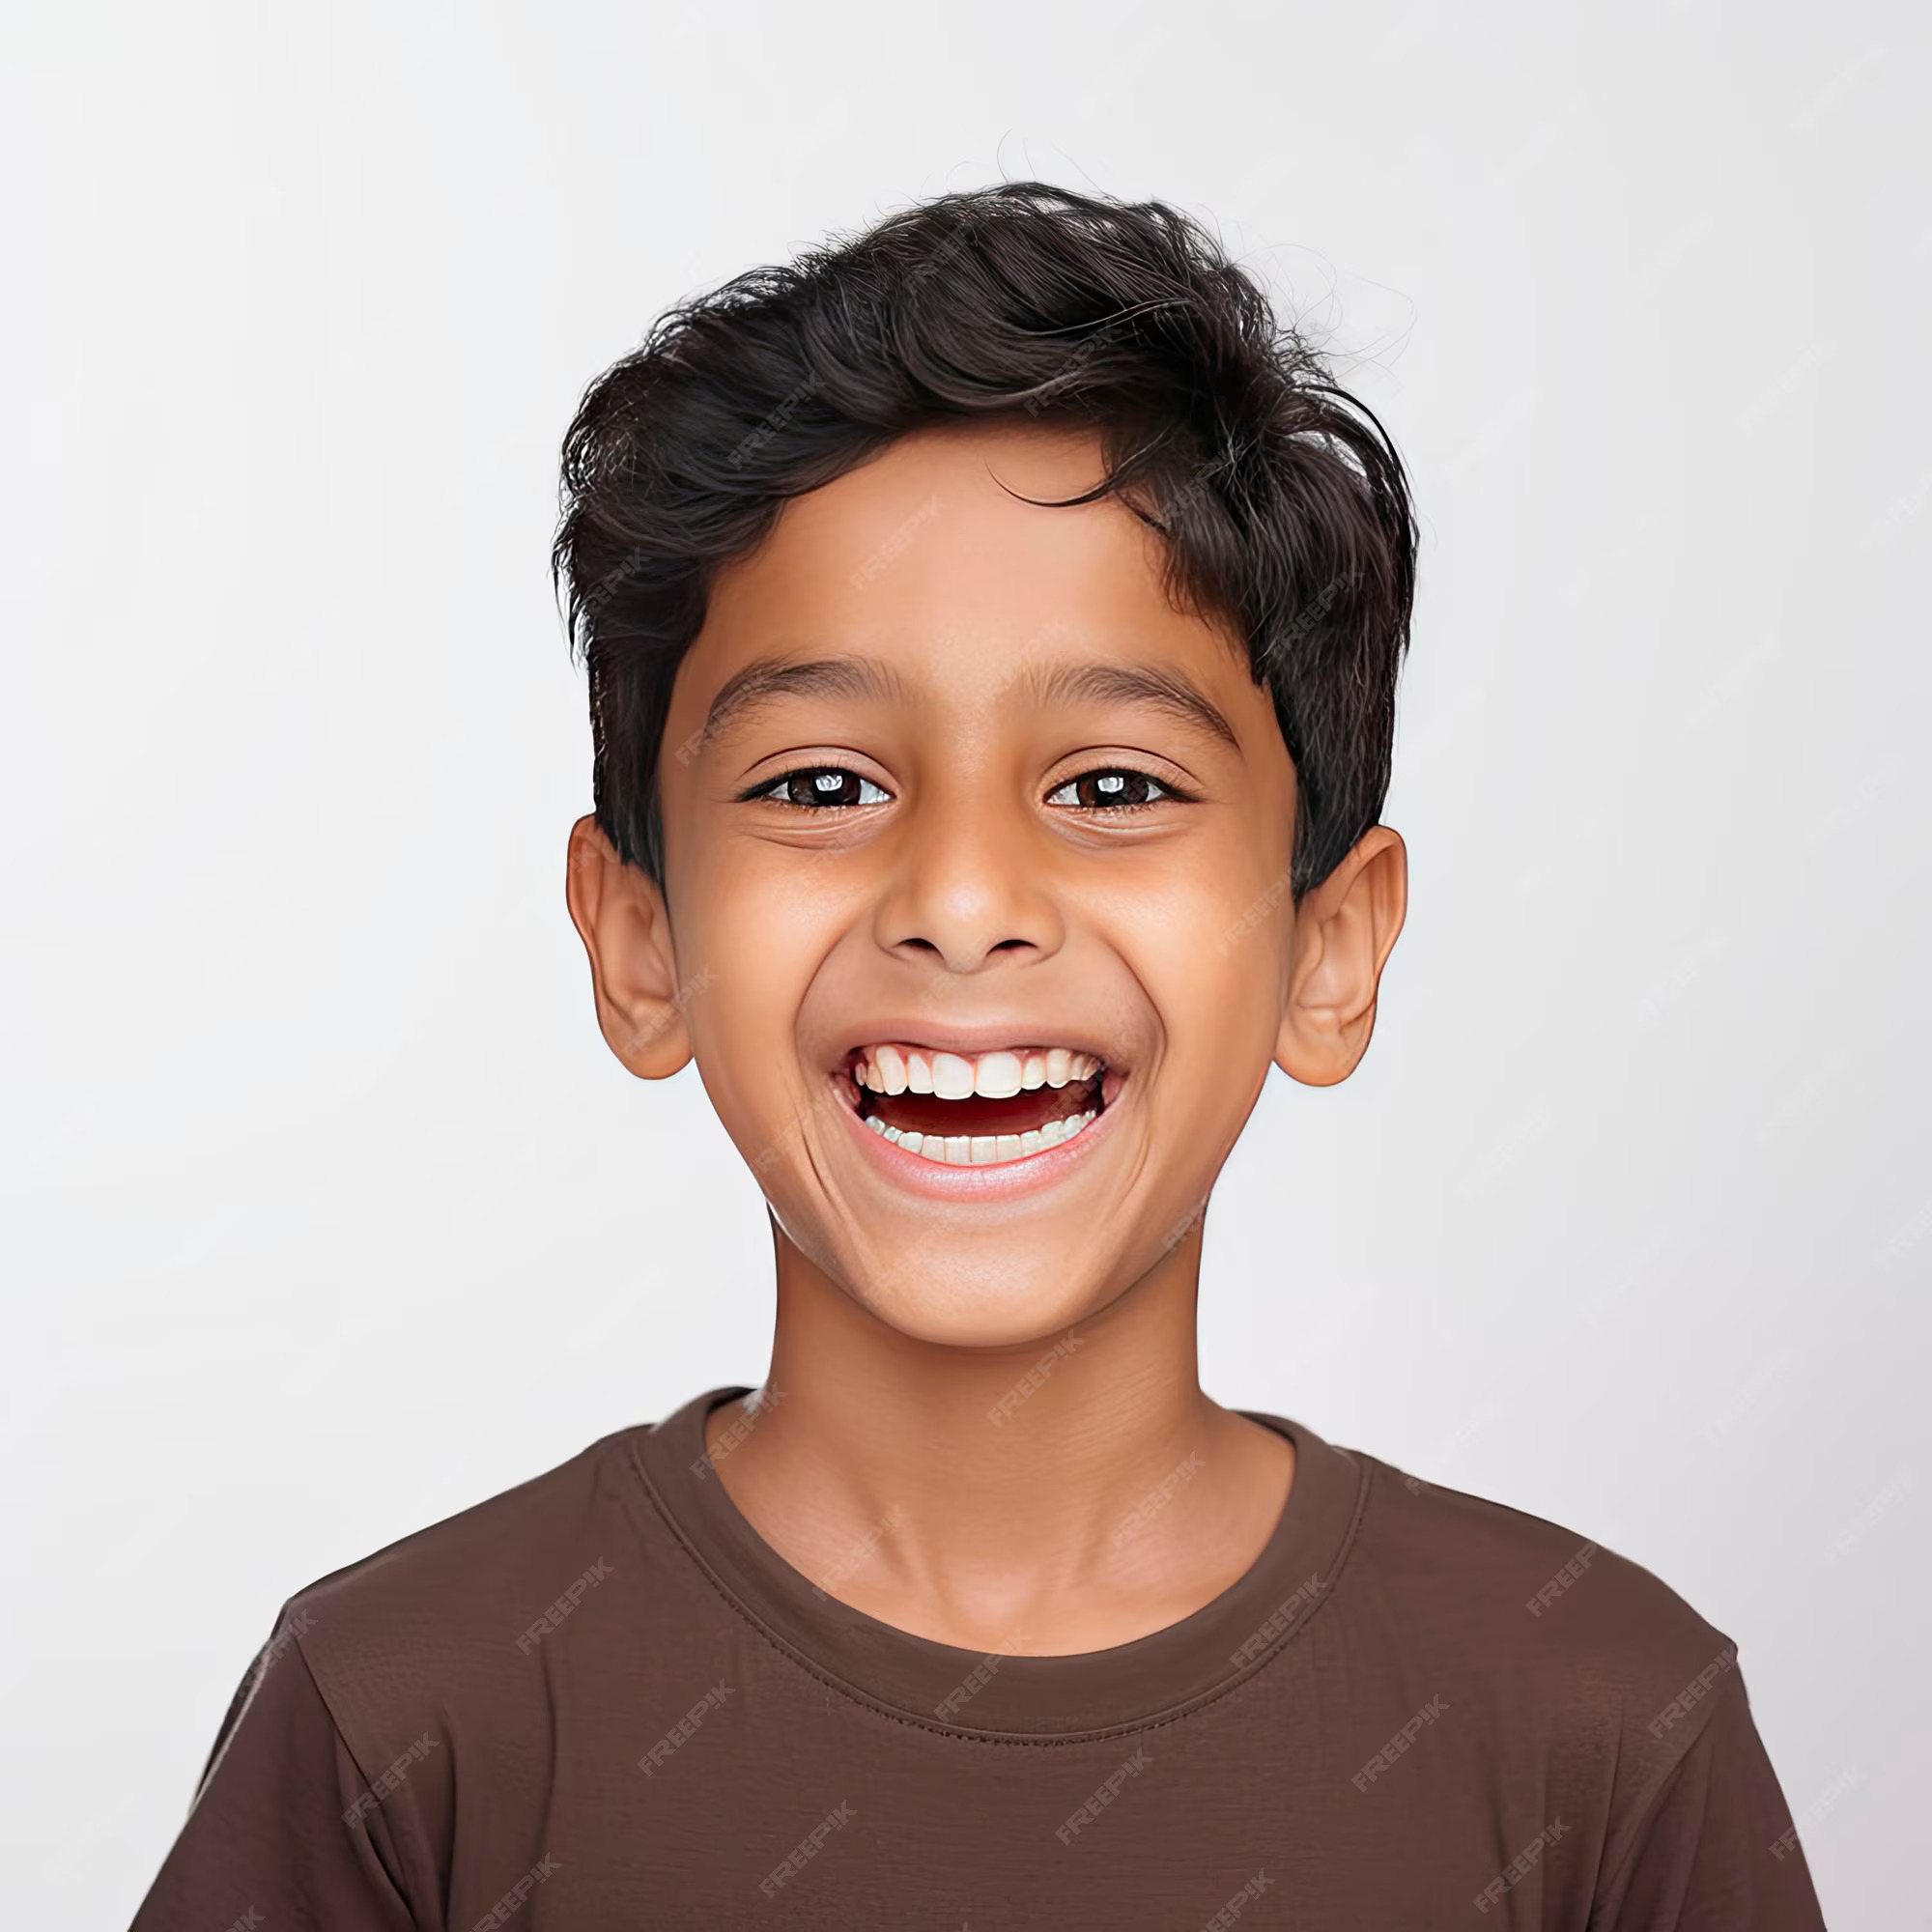

In [3]:
from IPython.display import Image
Image(filename=r"C:\Users\bishn\Downloads\project\indian-child-smiling_.jpg",width=200,height=200 )

In [4]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load your trained model
model = load_model(r"C:\Users\bishn\Downloads\project\model.h5")

# FER2013 emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Load and preprocess the image
img_path = r"C:\Users\bishn\Downloads\project\indian-child-smiling_.jpg"  # Path to your image
img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')
img_array = image.img_to_array(img)  # shape: (48, 48, 1)
img_array = np.expand_dims(img_array, axis=0)  # shape: (1, 48, 48, 1)
img_array /= 255.0  # normalize

# Predict the emotion
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)
predicted_label = emotion_labels[predicted_class]

print("Predicted Class Index:", predicted_class)
print("Predicted Emotion:", predicted_label)

C:\Users\bishn\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\bishn\AppData\Roaming\Python\Python310\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step
Predicted Class Index: 3
Predicted Emotion: Happy


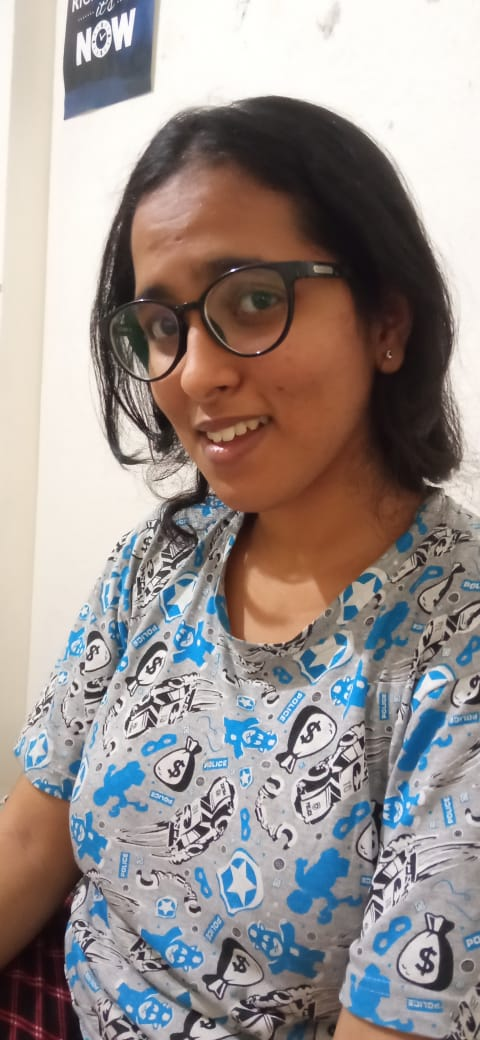

In [5]:
from IPython.display import Image
Image(filename=r"C:\Users\bishn\Downloads\project\rj_happy.jpg",width=200,height=200 )

In [6]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load your trained model
model = load_model(r"C:\Users\bishn\Downloads\project\model.h5")

# FER2013 emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Load and preprocess the image
img_path = r"C:\Users\bishn\Downloads\project\rj_happy.jpg"  # Path to your image
img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')
img_array = image.img_to_array(img)  # shape: (48, 48, 1)
img_array = np.expand_dims(img_array, axis=0)  # shape: (1, 48, 48, 1)
img_array /= 255.0  # normalize

# Predict the emotion
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)
predicted_label = emotion_labels[predicted_class]

print("Predicted Class Index:", predicted_class)
print("Predicted Emotion:", predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step
Predicted Class Index: 4
Predicted Emotion: Sad


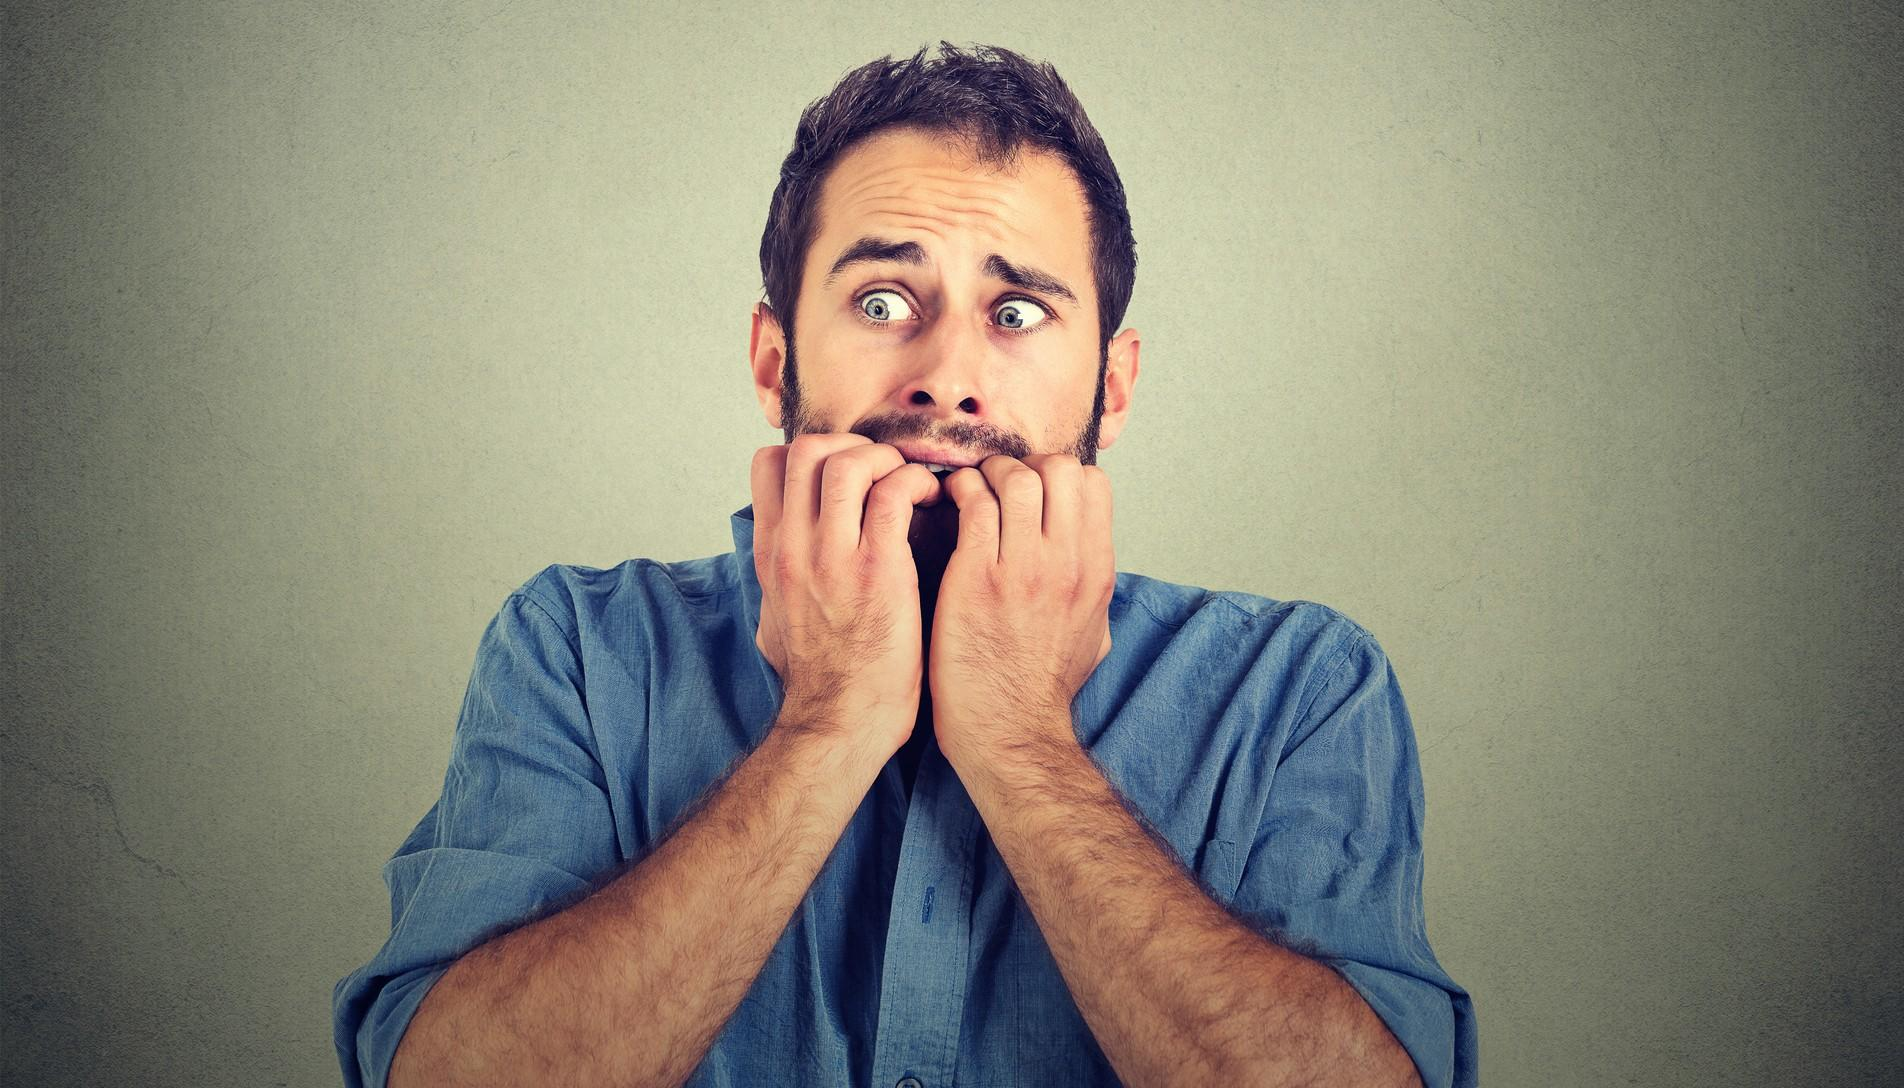

In [7]:
from IPython.display import Image
Image(filename=r"C:\Users\bishn\Downloads\project\fear_man.jpg",width=200,height=200 )

In [8]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load your trained model
model = load_model(r"C:\Users\bishn\Downloads\project\model.h5")

# FER2013 emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Load and preprocess the image
img_path =  r"C:\Users\bishn\Downloads\project\fear_man.jpg"  # Path to your image
img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')
img_array = image.img_to_array(img)  # shape: (48, 48, 1)
img_array = np.expand_dims(img_array, axis=0)  # shape: (1, 48, 48, 1)
img_array /= 255.0  # normalize

# Predict the emotion
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)
predicted_label = emotion_labels[predicted_class]

print("Predicted Class Index:", predicted_class)
print("Predicted Emotion:", predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step
Predicted Class Index: 2
Predicted Emotion: Fear


In [9]:
import sys
!{sys.executable} -m pip install pyttsx3


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\bishn\anaconda3\envs\tf_env\python.exe -m pip install --upgrade pip


In [10]:
import cv2
import numpy as np
import pyttsx3
from tensorflow.keras.models import load_model

# Load model
model = load_model(r"C:\Users\bishn\Downloads\project\model.h5")


# Emotion labels (lowercase for filenames)
emotion_labels = ['angry','disgust','fear','happy','sad','surprise','neutral']

# Load emojis
emojis = {}
for label in emotion_labels:
    emoji_img = cv2.imread(f"{label}.png", cv2.IMREAD_UNCHANGED)
    if emoji_img is None:
        print(f"❌ Could not load {label}.png — check filename")
    else:
        emojis[label] = emoji_img

# Face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Text-to-speech engine
engine = pyttsx3.init()
last_spoken = ""  # To avoid repeating the same emotion

def speak_emotion(emotion):
    global last_spoken
    if emotion != last_spoken:  # Speak only if emotion changes
        engine.say(f"You are {emotion}")
        engine.runAndWait()
        last_spoken = emotion

def overlay_small_emoji(frame, emoji, x, y, size=25):
    emoji_resized = cv2.resize(emoji, (size, size))
    if emoji_resized.shape[2] == 4:  # PNG with alpha
        alpha_s = emoji_resized[:, :, 3] / 255.0
        alpha_l = 1.0 - alpha_s
        for c in range(0, 3):
            frame[y:y+size, x:x+size, c] = (
                alpha_s * emoji_resized[:, :, c] +
                alpha_l * frame[y:y+size, x:x+size, c]
            )
    else:
        frame[y:y+size, x:x+size] = emoji_resized

# Start webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_gray = cv2.resize(roi_gray, (48, 48))
        roi = roi_gray.astype('float') / 255.0
        roi = np.expand_dims(roi, axis=0)
        roi = np.expand_dims(roi, axis=-1)

        prediction = model.predict(roi, verbose=0)
        predicted_label = emotion_labels[np.argmax(prediction)]

        # Speak detected emotion
        speak_emotion(predicted_label)

        # Draw label text
        label_x, label_y = x, y - 10
        cv2.putText(frame, predicted_label.capitalize(), (label_x, label_y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,255,0), 2)

        # Draw emoji beside label
        overlay_small_emoji(frame, emojis[predicted_label], label_x + (len(predicted_label) * 15),
                            label_y - 20, size=25)

        # Draw rectangle around face
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255,0,0), 2)

    cv2.imshow("FER with Emojis & Voice", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

ValueError: operands could not be broadcast together with shapes (25,25) (0,25) 

In [10]:
import cv2
import numpy as np
import pyttsx3
from tensorflow.keras.models import load_model

# -------------------------------
# Load trained model
# -------------------------------
model = load_model(r"C:\Users\bishn\Downloads\project\model.h5")

# Emotion labels (match your training order)
emotion_labels = ['angry','disgust','fear','happy','sad','surprise','neutral']

# -------------------------------
# Load emojis for each emotion
# -------------------------------
emojis = {}
for label in emotion_labels:
    emoji_img = cv2.imread(f"{label}.png", cv2.IMREAD_UNCHANGED)  # keep alpha channel
    if emoji_img is None:
        print(f"❌ Could not load {label}.png — check filename")
    else:
        emojis[label] = emoji_img

# -------------------------------
# Haar face detector
# -------------------------------
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# -------------------------------
# Text-to-Speech setup
# -------------------------------
engine = pyttsx3.init()
last_emotion = None   # store last detected emotion

def speak_emotion(emotion):
    """Speaks only when emotion changes"""
    global last_emotion
    if emotion != last_emotion:
        engine.say(f"You are {emotion}")
        engine.runAndWait()
        last_emotion = emotion

# -------------------------------
# Overlay emoji safely on frame
# -------------------------------
def overlay_small_emoji(frame, emoji, x, y, size=25):
    h, w = frame.shape[:2]

    # Clip coordinates inside frame
    if x < 0: x = 0
    if y < 0: y = 0
    if x + size > w: size = w - x
    if y + size > h: size = h - y
    if size <= 0:
        return frame  # nothing to draw

    emoji_resized = cv2.resize(emoji, (size, size))
    if emoji_resized.shape[2] == 4:  # PNG with transparency
        alpha_s = emoji_resized[:, :, 3] / 255.0
        alpha_l = 1.0 - alpha_s
        for c in range(0, 3):
            frame[y:y+size, x:x+size, c] = (
                alpha_s * emoji_resized[:, :, c] +
                alpha_l * frame[y:y+size, x:x+size, c]
            )
    else:
        frame[y:y+size, x:x+size] = emoji_resized

    return frame

# -------------------------------
# Start webcam
# -------------------------------
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_gray = cv2.resize(roi_gray, (48, 48))
        roi = roi_gray.astype('float32') / 255.0
        roi = np.expand_dims(roi, axis=0)
        roi = np.expand_dims(roi, axis=-1)

        # Predict emotion
        prediction = model.predict(roi, verbose=0)
        predicted_label = emotion_labels[np.argmax(prediction)]

        # Speak if emotion changes
        speak_emotion(predicted_label)

        # Show label text
        label_x, label_y = x, y - 10
        cv2.putText(frame, predicted_label.capitalize(), (label_x, label_y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,255,0), 2)

        # Show emoji beside label
        if predicted_label in emojis:
            overlay_small_emoji(frame, emojis[predicted_label],
                                label_x + (len(predicted_label) * 15),
                                label_y - 30, size=30)

        # Draw face box
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255,0,0), 2)

    # Show window
    cv2.imshow("Face Emotion Recognition", frame)

    # Quit on 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [11]:
import cv2
import numpy as np
import pyttsx3
from tensorflow.keras.models import load_model

# -------------------------------
# Load trained model
# -------------------------------
model = load_model(r"C:\Users\bishn\Downloads\project\model.h5")

# Emotion labels (match your training order)
emotion_labels = ['angry','disgust','fear','happy','sad','surprise','neutral']

# -------------------------------
# Load emojis for each emotion
# -------------------------------
emojis = {}
for label in emotion_labels:
    emoji_img = cv2.imread(f"{label}.png", cv2.IMREAD_UNCHANGED)  # keep alpha channel
    if emoji_img is None:
        print(f"❌ Could not load {label}.png — check filename")
    else:
        emojis[label] = emoji_img

# -------------------------------
# Haar face detector
# -------------------------------
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# -------------------------------
# Text-to-Speech setup
# -------------------------------
engine = pyttsx3.init()
last_emotion = None   # store last detected emotion

def speak_emotion(emotion):
    """Speaks every time emotion changes"""
    global last_emotion
    if emotion != last_emotion:   # only if it changed
        engine.say(f"You are {emotion}")
        engine.runAndWait()
        last_emotion = emotion     # update last emotion

# -------------------------------
# Overlay emoji safely on frame
# -------------------------------
def overlay_small_emoji(frame, emoji, x, y, size=25):
    h, w = frame.shape[:2]

    # Clip coordinates inside frame
    if x < 0: x = 0
    if y < 0: y = 0
    if x + size > w: size = w - x
    if y + size > h: size = h - y
    if size <= 0:
        return frame  # nothing to draw

    emoji_resized = cv2.resize(emoji, (size, size))
    if emoji_resized.shape[2] == 4:  # PNG with transparency
        alpha_s = emoji_resized[:, :, 3] / 255.0
        alpha_l = 1.0 - alpha_s
        for c in range(0, 3):
            frame[y:y+size, x:x+size, c] = (
                alpha_s * emoji_resized[:, :, c] +
                alpha_l * frame[y:y+size, x:x+size, c]
            )
    else:
        frame[y:y+size, x:x+size] = emoji_resized

    return frame

# -------------------------------
# Start webcam
# -------------------------------
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_gray = cv2.resize(roi_gray, (48, 48))
        roi = roi_gray.astype('float32') / 255.0
        roi = np.expand_dims(roi, axis=0)
        roi = np.expand_dims(roi, axis=-1)

        # Predict emotion
        prediction = model.predict(roi, verbose=0)
        predicted_label = emotion_labels[np.argmax(prediction)]

        # Speak if emotion changes
        speak_emotion(predicted_label)

        # Show label text
        label_x, label_y = x, y - 10
        cv2.putText(frame, predicted_label.capitalize(), (label_x, label_y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,255,0), 2)

        # Show emoji beside label
        if predicted_label in emojis:
            overlay_small_emoji(frame, emojis[predicted_label],
                                label_x + (len(predicted_label) * 15),
                                label_y - 30, size=30)

        # Draw face box
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255,0,0), 2)

    # Show window
    cv2.imshow("Face Emotion Recognition", frame)

    # Quit on 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()